In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/mar_6-10.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(84068, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-03-06,1235717949878489088,Coronavirus Outbreak: Indian Shuttlers Withdra...,[],0.0,{'country_code': 'in'},coronavirus outbreak indian shuttlers withdraw...
1,2020-03-06,1235718742941683712,"YUCK IT UP, jerk off. It’s all so very funny, ...",[],38.0,"{'country_code': 'in', 'state': 'Odisha', 'co...",yuck jerk funny ? people dying losing liveliho...
2,2020-03-06,1235718913075212289,Coronavirus: Hong Kong races to find close con...,[],10.0,{'country_code': 'in'},coronavirus hong kong races find close contact...
3,2020-03-06,1235719569005821953,I just landed at JFK after reporting on #coron...,['coronavirus'],62822.0,"{'country_code': 'in', 'state': 'Punjab', 'co...",landed jfk reporting coronavirus milan lombard...
4,2020-03-06,1235719670503813122,#SalmanKhan urges people to greet with namaste...,['SalmanKhan'],23.0,{'country_code': 'in'},salmankhan urges people greet namaste salaam a...


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
84063,2020-03-10,1237172750612983808,New Mexico you're doing amazing sweetie https:...,[],1112.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",new mexico amazing sweetie
84064,2020-03-10,1237210936743612416,#COVID19 advice for #Americans from inside #It...,"['COVID19', 'Americans', 'Italy', 'Prepare', '...",1.0,{'country_code': 'in'},covid advice americans inside italy prepare co...
84065,2020-03-10,1237250185916375040,"Fuck this corona virus, Fuck @china country, F...",[],0.0,{'country_code': 'in'},fuck corona virus fuck country fuck chinese pe...
84066,2020-03-10,1237259138914062336,Holi in the times of Corona could rival Love i...,[],0.0,"{'country_code': 'in', 'state': 'Odisha', 'co...",holi times corona could rival love times chole...
84067,2020-03-10,1237435518587109378,Gyms in Erbil to remain closed as coronavirus ...,"['NRTnews', 'Iraq', 'TwitterKurds', 'Erbil', '...",6.0,{'country_code': 'in'},gyms erbil remain closed coronavirus measures ...


In [ ]:
print(df.shape)
df.isnull().sum()

(84068, 7)


date             0
id               0
text             0
hashtags         0
retweet_count    0
location         0
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    coronavirus outbreak indian shuttlers withdraw...
1    yuck jerk funny  people dying losing livelihoo...
2    coronavirus hong kong races find close contact...
3    landed jfk reporting coronavirus milan lombard...
4    salmankhan urges people greet namaste salaam a...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

84068


'coronavirus outbreak indian shuttlers withdraw england ships'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

In [ ]:
t_clean[0]

['coronavirus',
 'outbreak',
 'indian',
 'shuttlers',
 'withdraw',
 'england',
 'ship']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

coronavirus


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

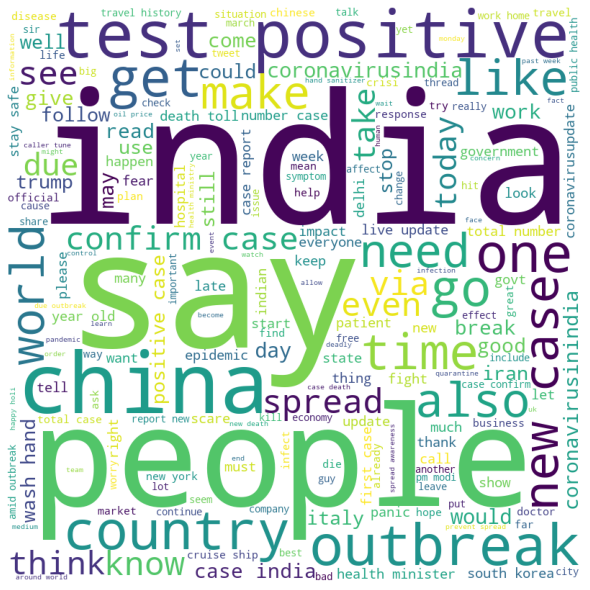

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['coronavirus outbreak indian shuttlers withdraw england ship',
 'yuck jerk funny people die lose livelihood hysterical trumper',
 'coronavirus hong kong race find close contact confirm patient visit least location city return india',
 'land jfk report coronavirus milan lombardy epicenter italy outbreak walk right u custom ask italy go come contact sick people ask anything',
 'salmankhan urge people greet namaste salaam amid coronavirus scare urge netizens adopt traditional salutation style like namaste salaam greet everyone wake coronavirus outbreak share picture workout session sm']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across country',
 'across globe',
 'across india',
 'across world',
 'action take',
 'active case',
 'add per',
 'add per government',
 'affair minister',
 'affect country',
 'affect know',
 'affect know many',
 'affect way',
 'affect way prevent',
 'affected country',
 'air force',
 'alcohol base',
 'alert add',
 'alert add per',
 'amid concern',
 'amid fear',
 'amid outbreak',
 'amid scare',
 'announcement make',
 'announcement make outgo',
 'anti inflammatory',
 'anyone cough',
 'anyone experience',
 'anyone experience cough',
 'appeal people',
 'appeal people stay',
 'around world',
 'asharamji bapu',
 'ask people',
 'asks official',
 'asks official ensure',
 'atleast death',
 'atleast death full',
 'audio start',
 'avoid close',
 'avoid close contact',
 'avoid handshake',
 'avoid large',
 'avoid spread',
 'avoid touch',
 'avoid touch eye',
 'awareness audio',
 'awareness campaign',
 'awareness message',
 'awareness thank',
 'away rumour',
 'away rumour regard',
 'back indian',
 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:year old,south korea,stock market,face mask,china death,self quarantine,amid scare,india india,help spread,toilet paper\nTopic 1:death toll,new york,public health,sars cov,look like,hit iran,make sure,world health,chief minister,whole world\nTopic 2:new case,stay safe,happy holi,report new,total case,new death,people die,report new case,test negative,worldwide last\nTopic 3:past week,work home,wuhan china,positive kerala,xi jinping,test positive kerala,celebrate holi,people test,close contact,wash hand\nTopic 4:live update,case report,cruise ship,full video,full video youtube,china death worldwide,wuhan china death,video youtube channel,precautionary measure,report case\nTopic 5:wash hand,case confirm,case rise,play holi,stay home,isolation ward,till march,saudi arabia,air force,make call\nTopic 6:health minister,fear bitcoin,bitcoin slump past,slump past,fear bitcoin slump,outbreak fear bitcoin,bitcoin slump,slump past week,first case,around world\nTopic 7:test positive,case 

In [ ]:
lda.perplexity(tf)

521.95592396141

In [ ]:
f=open('lda_mar_6_10.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_mar_6_10.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_mar_6_10.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_mar_6_10.pk')
shutil.move("topics_mar_6_10.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_mar_6_10.txt')